Mount Libraries

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Libraries

In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



**Load and Explore the Data**

In [124]:
titanic_data = pd.read_csv('/content/drive/MyDrive/PGD DS/unit 2/titanic.csv')

In [125]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [126]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [127]:
titanic_data.shape

(418, 12)

In [128]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [129]:
titanic_data.nunique()

,0
PassengerId,418
Survived,2
Pclass,3
Name,418
Sex,2
Age,79
SibSp,7
Parch,8
Ticket,363
Fare,169


In [130]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


Handling Missing and duplicate value and catagorical value

In [131]:
# Fill missing Age values with median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

In [132]:
# Fill missing 'Fare' values with the median
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

In [133]:
# Convert 'Sex' column to numeric (Male = 1, Female = 0)
titanic_data['Sex'] = titanic_data['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [134]:
# Handle missing Embarked values and encode 'Embarked' (S = 1, C = 2, Q = 3)
titanic_data['Embarked'].fillna('S', inplace=True)
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

# **Feature Selection**

In [135]:
# Select features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = titanic_data[features]
y = titanic_data['Survived']

Feature Distribution by Survived

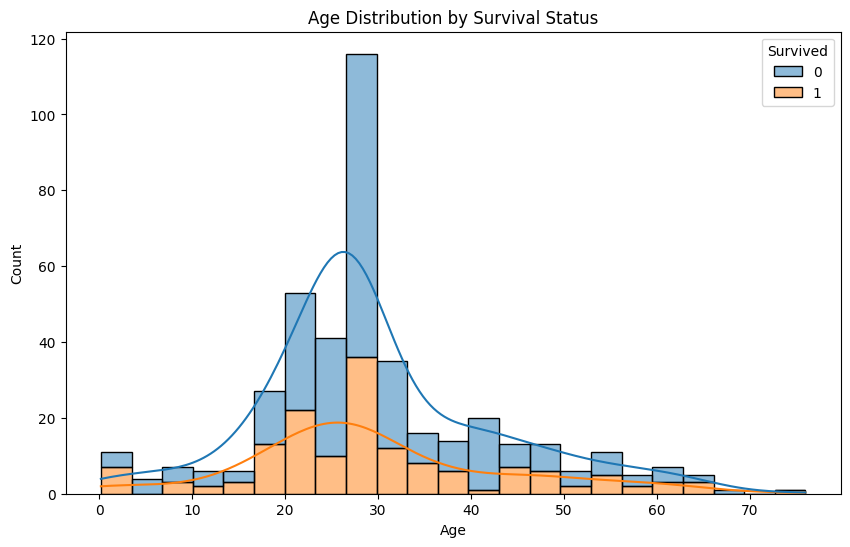

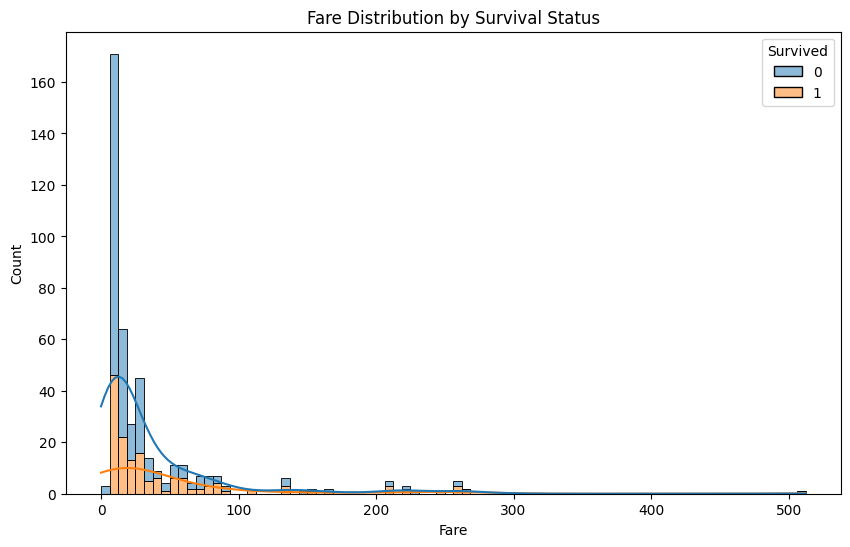

In [136]:
# Age distribution by Survived
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_data, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Age Distribution by Survival Status')
plt.show()

# Fare distribution by Survived
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_data, x='Fare', hue='Survived', multiple='stack', kde=True)
plt.title('Fare Distribution by Survival Status')
plt.show()

# **Training and testing data spliting **

In [137]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
# Standardize the feature values for clustering later
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Logistic Regression **

Logistic Regression Accuracy: 1.0
Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Confusion Matrix:
 [[50  0]
 [ 0 34]]


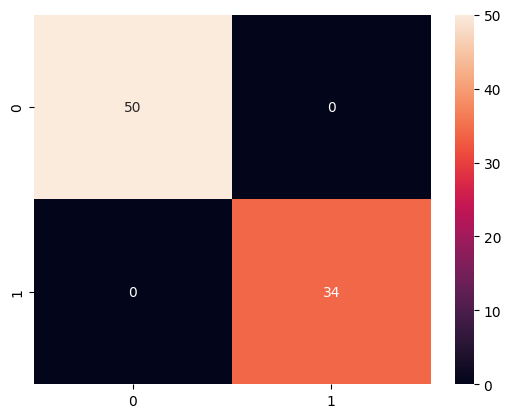

In [139]:
# Import logistic regression model from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the model
logistic_model = LogisticRegression(max_iter=1000)

# Fit the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model using accuracy and confusion matrix
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
confusion_logistic = confusion_matrix(y_test, y_pred_logistic)

print(f'Logistic Regression Accuracy: {accuracy_logistic}')
print("Report",classification_report(y_test, y_pred_logistic))
print('Confusion Matrix:\n', confusion_logistic)
cm = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()


In [140]:
# Get coefficients and intercept
print("Coefficients:", logistic_model.coef_)
print("Intercept:", logistic_model.intercept_)

Coefficients: [[-1.03784254e-01 -6.29154845e+00 -2.24376572e-03  7.08676649e-02
   9.21436943e-02  2.37123810e-03  2.28056883e-01]]
Intercept: [2.61533498]


In [141]:
import statsmodels.api as sm
stat_X = sm.add_constant(X)
stat_y = titanic_data['Survived']
# Fit the logistic regression model

logit_model = sm.Logit(stat_y,stat_X).fit(method='bfgs')
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  418
Model:                          Logit   Df Residuals:                      410
Method:                           MLE   Df Model:                            7
Date:                Wed, 18 Sep 2024   Pseudo R-squ.:                   1.000
Time:                        22:48:10   Log-Likelihood:            -0.00018399
converged:                       True   LL-Null:                       -273.99
Covariance Type:            nonrobust   LLR p-value:                3.836e-114
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5756   1133.613      

**Elbow Method to Determine Optimal Clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

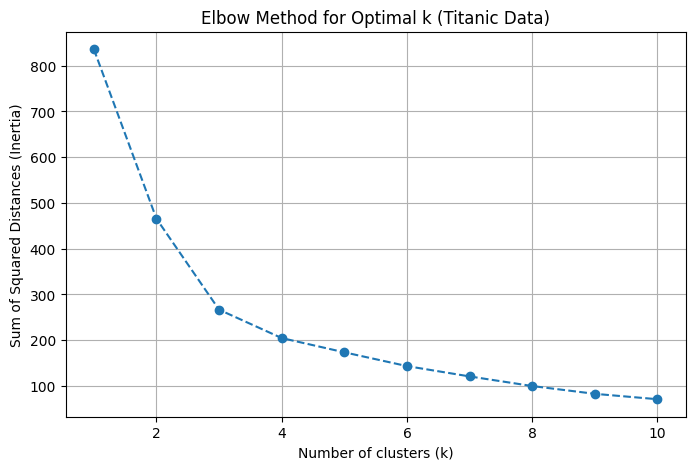

In [142]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the Titanic dataset (assuming it's loaded into a pandas DataFrame)
# For demonstration, you may load it as titanic_data = pd.read_csv('titanic.csv')

# Select the features Age, Pclass, Fare
X = titanic_data[['Age', 'Fare']]
# Standardize the features (K-means requires features to be on a similar scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Use the Elbow Method to find the optimal number of clusters
sse = []

# Run K-means for different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)  # Inertia: Sum of squared distances to the closest cluster center

# Plot the SSE values for each k to visualize the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k (Titanic Data)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.grid(True)
plt.show()


# **K Mean Clustering **

In [143]:
# Applying K-means clustering with the chosen number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster assignments
clusters = kmeans.labels_

# Add the cluster assignments to the original dataset for analysis
titanic_data['Cluster'] = clusters

# Print the first few rows to see the cluster assignments
print(titanic_data[['Age','Fare', 'Cluster']].head())

    Age     Fare  Cluster
0  34.5   7.8292        1
1  47.0   7.0000        2
2  62.0   9.6875        2
3  27.0   8.6625        1
4  22.0  12.2875        1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


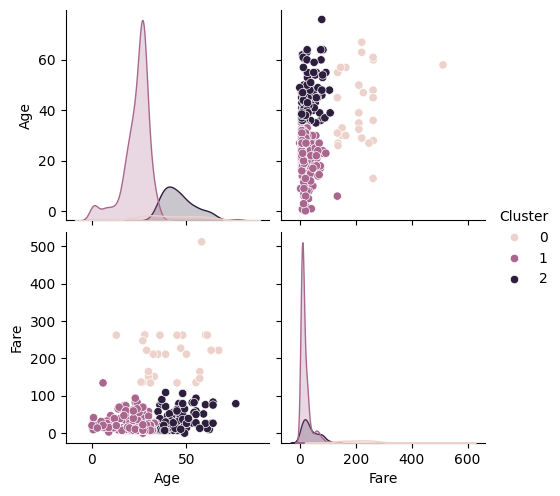

In [144]:
import seaborn as sns

# Plot the clusters using a pair plot
sns.pairplot(titanic_data, hue='Cluster', vars=['Age','Fare'])
plt.show()

# **Decision Tree Regressor **

Decision Tree Regressor RMSE: 35.583567611840074


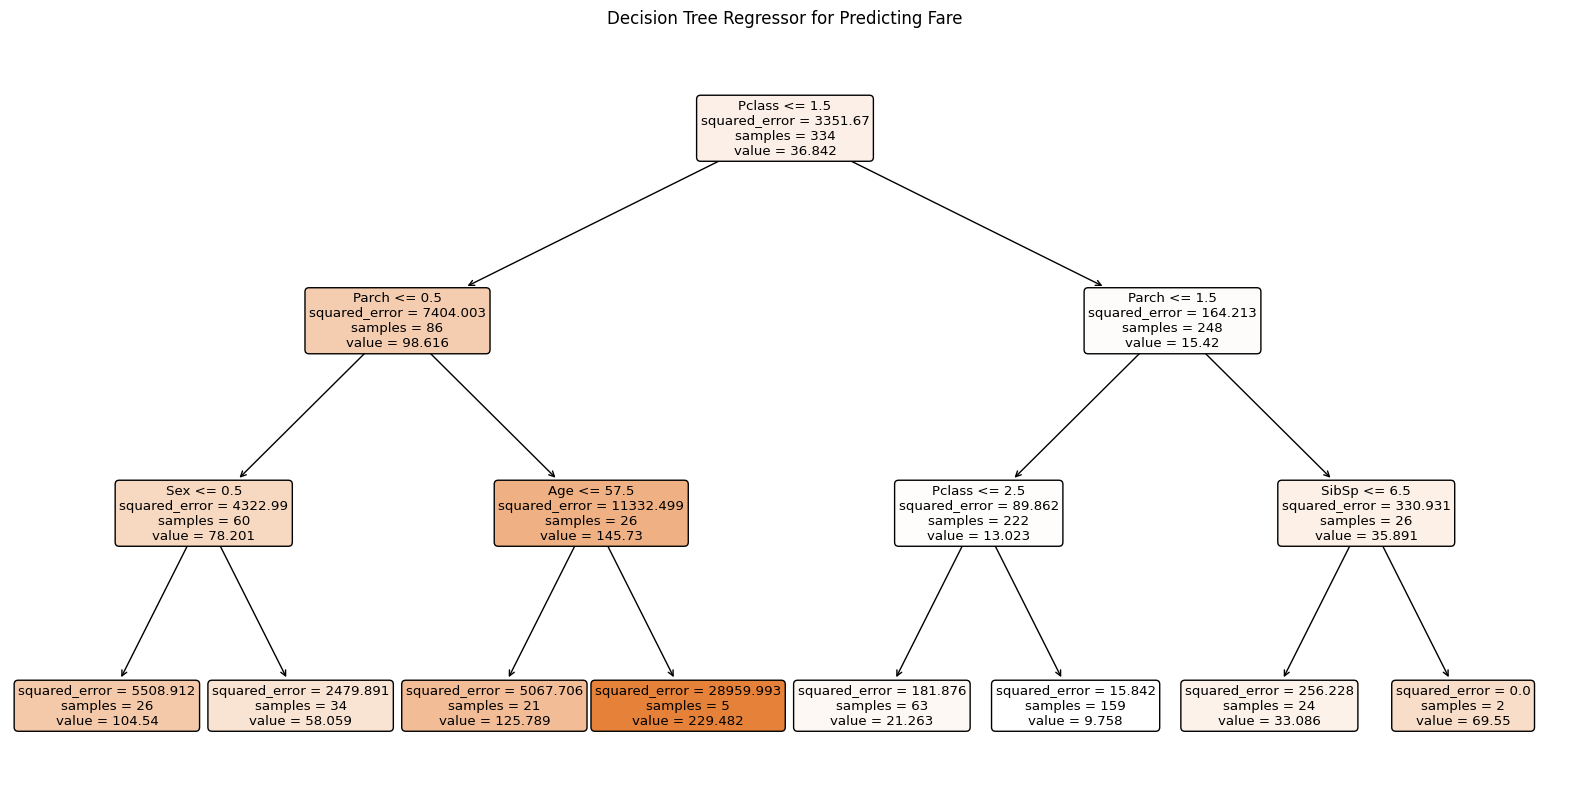

In [145]:
# Import DecisionTreeRegressor from scikit-learn
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
# Import the plot_tree function
from sklearn.tree import plot_tree

# Select features for regression (let's predict 'Fare')
X_regression = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Embarked']]
y_regression = titanic_data['Fare']

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=30)

# Fit the model to the training data
tree_regressor.fit(X_train_reg, y_train_reg)

# Make predictions on the test data
y_pred_reg = tree_regressor.predict(X_test_reg)

# Evaluate the model using Mean Squared Error and Root Mean Squared Error
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)

print(f"Decision Tree Regressor RMSE: {rmse}")

# Visualize the Decision Tree for Regression
plt.figure(figsize=(20,10))
plot_tree(tree_regressor, filled=True, feature_names=X_regression.columns, rounded=True)
plt.title("Decision Tree Regressor for Predicting Fare")
plt.show()